In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD, Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

import math

In [ ]:
def plot_predictions(test, predicted):
  plt.plot(test, color = 'red', label = 'Real IBM Stock Price', lw = 2)
  plt.plot(predicted, color = 'blue', label = 'Predicted IBM Stock Price', lw = 2)

  plt.title('IBM Stock Price Prediction', fontsize = 14)
  plt.xlabel('Time', fontsize = 11)
  plt.ylabel('IBM Stock Price', fontsize = 11)
  plt.tick_params(axis = 'both', labelsize = 11)
  plt.legend(fontsize = 11)
  plt.show()

def return_rmse(test, predicted):
  rmse = math.sqrt(mean_squared_error(test, predicted))
  print("The root mean suared error: {}".format(rmse))

In [ ]:
df = pd.read_csv('/content/IBM_2006-01-01_to_2018-01-01.csv', index_col = "Date",
                 parse_dates = ["Date"])

df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [ ]:
training_set = df[:"2016"].iloc[:, 1:2].values
test_set = df["2017":].iloc[:, 1:2].values

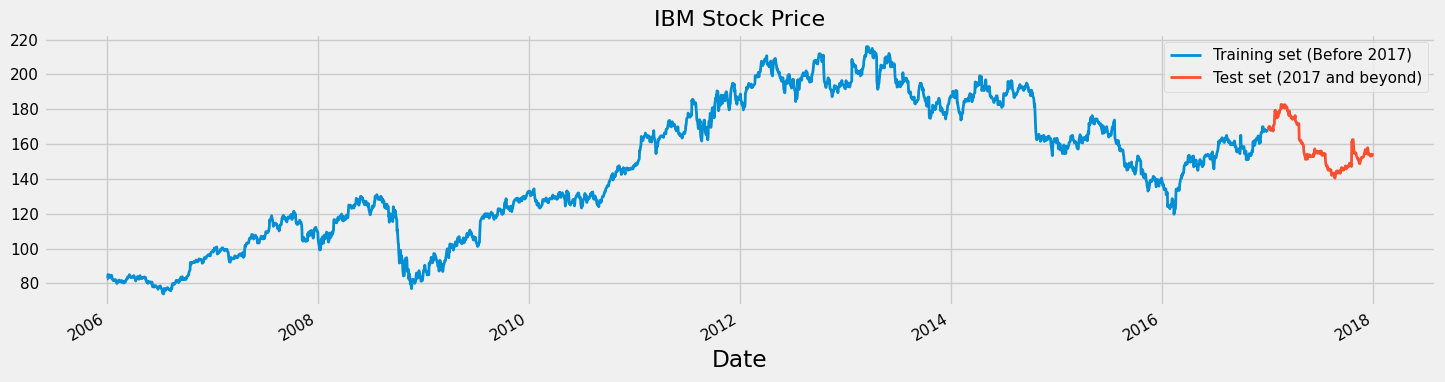

In [ ]:
df['High'][: '2016'].plot(figsize = (16, 4), legend = True, lw = 2)
df['High']['2017':].plot(figsize = (16, 4), legend = True, lw = 2)

plt.legend(['Training set (Before 2017)', 'Test set (2017 and beyond)'],
           fontsize = 11)
plt.title('IBM Stock Price', fontsize = 16)
plt.xticks()
plt.tick_params(axis = 'both', labelsize = 11)
plt.show()

In [ ]:
scaler = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = scaler.fit_transform(training_set)

In [ ]:
X_train = []
y_train = []

for i in range(60, 2769):
  X_train.append(training_set_scaled[i - 60: i, 0])
  y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0490
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0024
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0021
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0021
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0020
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0019
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0017
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0019
Epoch 9/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0015
Epoch 10/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0016
Epoch 11/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0016
Epoch 12/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0014
Epoch 13/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0014
Epoch 14/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0012
Epoch 15/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0011
Epoch 16/50
85/

In [ ]:
df_total = pd.concat((df['High'][: '2016'], df['High']['2017':]), axis = 0)
inputs = df_total[len(df_total) - len(test_set) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

In [ ]:
X_test = []

for i in range(60, 311):
  X_test.append(inputs[i - 60: i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


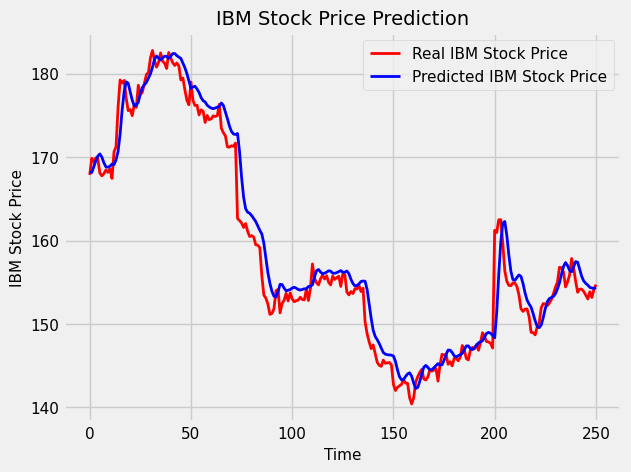

In [ ]:
plot_predictions(test_set, predicted_stock_price)

In [ ]:
return_rmse(test_set, predicted_stock_price)

The root mean suared error: 2.4216454340606623
